In [5]:
R.<x,y> = PolynomialRing(QQ,2)
gf = R.ideal([x^3-y,y^3-x-1]).groebner_fan()
H = gf.homogeneity_space()

In [7]:
gf.dimension_of_homogeneity_space()

0

Problem 3.22: looking at the variety of $3\times 4$ matrices with rank $\leq 2$. 
Given a matrix: 

$
\left(\begin{array}{rrrr}
a & b & c & d \\
e & f & g & h \\
i & j & k & l
\end{array}\right)
$

We want the ideal generated by 


$ \langle -{\left(g j - f k\right)} a + {\left(c j - b k\right)} e - {\left(c f - b g\right)} i, -{\left(h j - f l\right)} a + {\left(d j - b l\right)} e - {\left(d f - b h\right)} i, -{\left(h k - g l\right)} a + {\left(d k - c l\right)} e - {\left(d g - c h\right)} i, -{\left(h k - g l\right)} b + {\left(d k - c l\right)} f - {\left(d g - c h\right)} j \rangle$

In [6]:
A = Matrix(SR,3,4,var('a, b, c, d, e, f, g, h, i, j, k, l'))
R.<x, y, z> = BooleanPolynomialRing()
R.<a,b,c,d,e,f,g,h,i,j,k,l> = QQ[]
print(latex(A))
polys = A.minors(3)
print(latex(polys))
J = R.ideal(polys)
## generating the 
F = J.groebner_fan().tropical_intersection()


\left(\begin{array}{rrrr}
a & b & c & d \\
e & f & g & h \\
i & j & k & l
\end{array}\right)
\left[-{\left(g j - f k\right)} a + {\left(c j - b k\right)} e - {\left(c f - b g\right)} i, -{\left(h j - f l\right)} a + {\left(d j - b l\right)} e - {\left(d f - b h\right)} i, -{\left(h k - g l\right)} a + {\left(d k - c l\right)} e - {\left(d g - c h\right)} i, -{\left(h k - g l\right)} b + {\left(d k - c l\right)} f - {\left(d g - c h\right)} j\right]


$\left(\begin{array}{rrrr}
a & b & c & d \\
e & f & g & h \\
i & j & k & l
\end{array}\right)$

$
\left[-{\left(g j - f k\right)} a + {\left(c j - b k\right)} e - {\left(c f - b g\right)} i, -{\left(h j - f l\right)} a + {\left(d j - b l\right)} e - {\left(d f - b h\right)} i, -{\left(h k - g l\right)} a + {\left(d k - c l\right)} e - {\left(d g - c h\right)} i, -{\left(h k - g l\right)} b + {\left(d k - c l\right)} f - {\left(d g - c h\right)} j\right]$

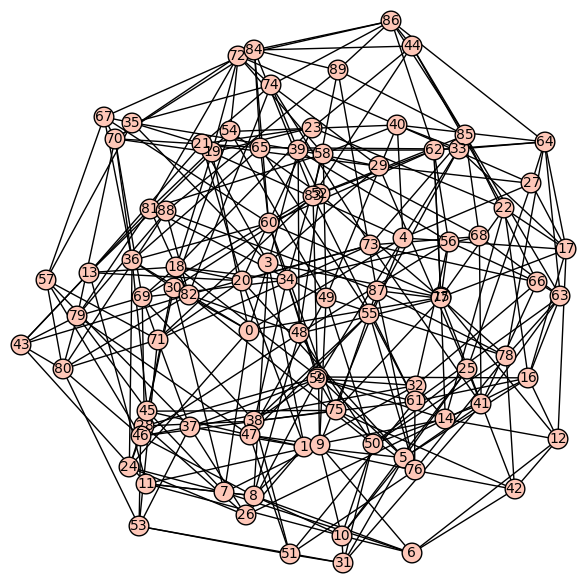

In [4]:
cones = F.cones()
maximal_cones = [ (i,set(f)) for i,f in enumerate(cones[F.dim()])]
codim1_cones = [ f for i,f in enumerate(cones[F.dim()-1])]

the_graph = Graph()

for face in codim1_cones:
    e = []
    for i,cone in maximal_cones:
        if cone.issuperset(face):
            e.append(i)
    for i in range(len(e)):
        for j in range(i,len(e)):
            the_graph.add_edge([e[i],e[j]])
    
the_graph.plot()


In [5]:
the_graph.is_connected()

True

In [64]:
F.f_vector()

[1, 12, 66, 132, 90]

In [44]:
I = R.ideal([a-b+e, a-c+d, b-c+f])
G = I.groebner_fan(); G
pf = G.tropical_intersection()

In [48]:
G.reduced_groebner_bases()

[[d - e - f, b - c + f, a - c + e + f],
 [-d + e + f, b - c + f, a - c + d],
 [-d + e + f, -a + c - d, -a + b - d + f],
 [-d + e + f, -b + c - f, a - b + d - f],
 [-a + b - d + f, a - b + e, -a + c - d],
 [b - c + f, -b + c - d + e, a - c + d],
 [-d + e + f, b - c + d - e, a - c + d],
 [-d + e + f, -b + c - d + e, a - b + e],
 [-d + e + f, -a + c - d, -a + b - e],
 [d - e - f, -b + c - f, a - b + e],
 [a - b + e, a - b + d - f, -b + c - f],
 [b - c + f, b - c + d - e, a - b + e],
 [b - c + f, a - b + e, a - c + d],
 [d - e - f, -a + c - e - f, -a + b - e],
 [a - c + e + f, a - c + d, b - c + f],
 [a - c + e + f, a - c + d, -a + b - e]]

In [94]:
Gdog = Graph()
Gdog.add_edge([1,2])

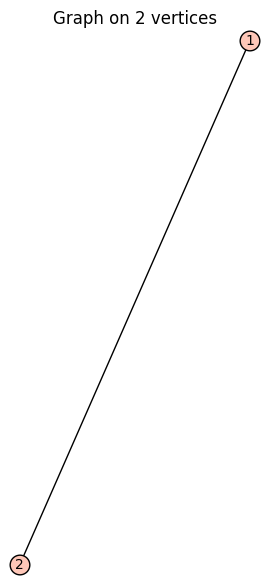

In [95]:
Gdog

In [39]:
pf.lineality_dim()

1

In [40]:
pf.dim()

6

In [47]:
pf.f_vector()

[1, 9, 15, 1]